In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from PIL import Image
import matplotlib.pyplot as plt


df = pd.read_csv('data/UTKFaceAugmented.csv')
print(len(df))
df.head(5)

23708


,Unnamed: 0,filename,age,gender,race,age_range,num_haircuts_life,has_tiktok,remembers_disco,uses_skincare,max_annual_earnings
0,0,100_0_0_20170112213500903.jpg.chip.jpg,100,male,white,100-119,360,no,no,no,32890.160162
1,1,100_0_0_20170112215240346.jpg.chip.jpg,100,male,white,100-119,627,no,no,no,29870.803247
2,2,100_1_0_20170110183726390.jpg.chip.jpg,100,female,white,100-119,687,no,yes,no,62930.622654
3,3,100_1_0_20170112213001988.jpg.chip.jpg,100,female,white,100-119,710,no,no,no,31105.957009
4,4,100_1_0_20170112213303693.jpg.chip.jpg,100,female,white,100-119,614,no,no,no,63977.673549


In [2]:
df = df.drop('race', axis=1)
print(df.dtypes)

Unnamed: 0               int64
filename                object
age                      int64
gender                  object
age_range               object
num_haircuts_life        int64
has_tiktok              object
remembers_disco         object
uses_skincare           object
max_annual_earnings    float64
dtype: object


Numeric Data

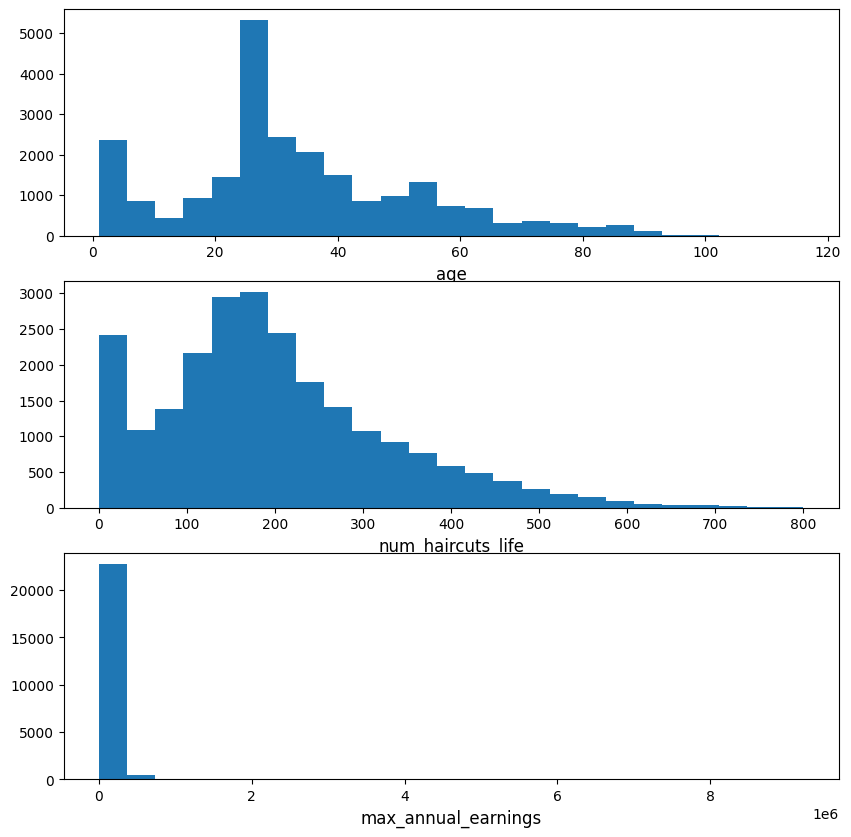

In [3]:
numeric_columns = ["age","num_haircuts_life","max_annual_earnings"]
fig, axs = plt.subplots(3,1, figsize=(10,10))
for i in range(3):
    axs[i].hist(df[numeric_columns[i]], bins = 25)
    axs[i].set_xlabel(numeric_columns[i], fontsize = 12)

In [4]:
df = df.drop('max_annual_earnings', axis = 1)

In [5]:
def standardize_numeric(series: pd.Series, use_log: bool = False) -> pd.Series:
    if use_log:
        series = np.log(series)
    series = (series - np.mean(series)) / np.std(series)
    return series

df['age_st'] = standardize_numeric(df['age'], False)
df['haircuts_st'] = standardize_numeric(df['num_haircuts_life'], False)

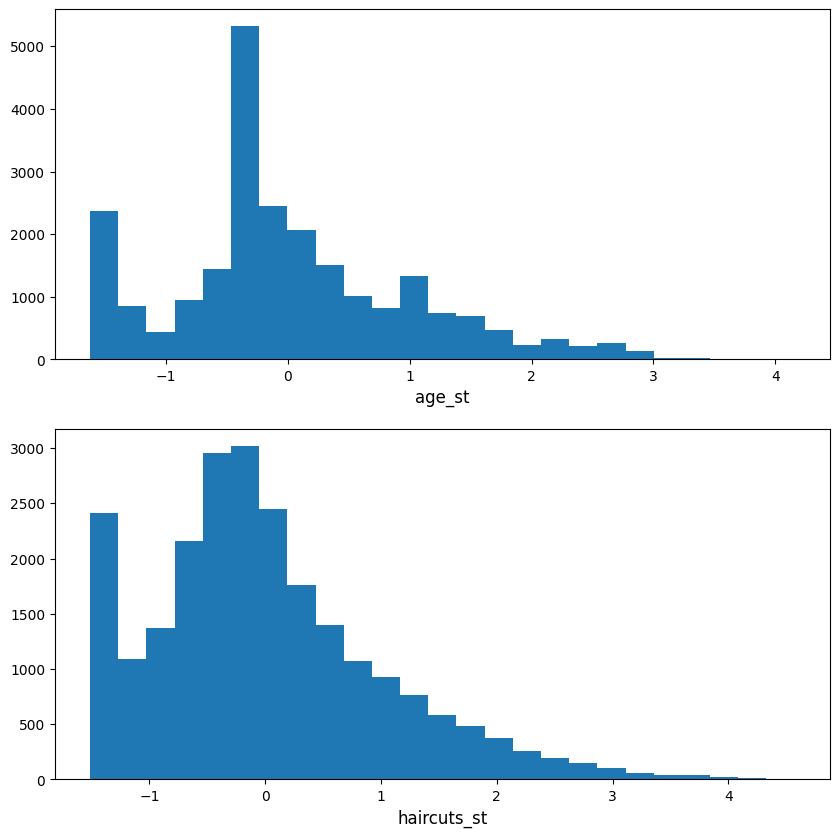

In [6]:
# visualize transformed numeric data
numeric_columns = ["age_st","haircuts_st"]
fig, axs = plt.subplots(2,1, figsize=(10,10))
for i in range(2):
    axs[i].hist(df[numeric_columns[i]], bins = 25)
    axs[i].set_xlabel(numeric_columns[i], fontsize = 12)

In [7]:
numerical_columns = df.select_dtypes(include=['float64']).columns

Categorical Data

In [8]:
df = df.drop('age_range', axis = 1)
print(df.dtypes)

Unnamed: 0             int64
filename              object
age                    int64
gender                object
num_haircuts_life      int64
has_tiktok            object
remembers_disco       object
uses_skincare         object
age_st               float64
haircuts_st          float64
dtype: object


In [9]:
# look at all labels for each column, and the number of appearances of each
categoric_columns = ['gender','has_tiktok','remembers_disco','uses_skincare']
for i in range(len(categoric_columns)):
    print(f"\nColumn: {categoric_columns[i]}")
    counts = df[categoric_columns[i]].value_counts()
    for label, count in counts.items():
        print(f"Label: '{label}' | Frequency: {count}")


Column: gender
Label: 'male' | Frequency: 12391
Label: 'female' | Frequency: 11317

Column: has_tiktok
Label: 'no' | Frequency: 18931
Label: 'yes' | Frequency: 4777

Column: remembers_disco
Label: 'no' | Frequency: 21095
Label: 'yes' | Frequency: 2613

Column: uses_skincare
Label: 'no' | Frequency: 16580
Label: 'yes' | Frequency: 7128


In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
categoric_columns = ['gender','has_tiktok','remembers_disco','uses_skincare']
one_hot_encoded = pd.DataFrame()

# for-loop assisted by ChatGPT
for col in categoric_columns:
    # Fit and transform each column separately
    one_hot_col = encoder.fit_transform(df[[col]]).toarray()

    # Create column names for the one-hot encoded features
    column_names = [f"{col}_{category}" for category in encoder.get_feature_names_out([col])]

    # Create a DataFrame with one-hot encoded features
    one_hot_col_df = pd.DataFrame(one_hot_col, columns=column_names)

    # Concatenate the one-hot encoded features to the result DataFrame
    one_hot_encoded = pd.concat([one_hot_encoded, one_hot_col_df], axis=1)

# Concatenate the one-hot encoded features with the original DataFrame
df= pd.concat([df, one_hot_encoded], axis=1)

df.head(10)

,Unnamed: 0,filename,age,gender,num_haircuts_life,has_tiktok,remembers_disco,uses_skincare,age_st,haircuts_st,gender_gender_female,gender_gender_male,has_tiktok_has_tiktok_no,has_tiktok_has_tiktok_yes,remembers_disco_remembers_disco_no,remembers_disco_remembers_disco_yes,uses_skincare_uses_skincare_no,uses_skincare_uses_skincare_yes
0,0,100_0_0_20170112213500903.jpg.chip.jpg,100,male,360,no,no,no,3.353995,1.225473,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,100_0_0_20170112215240346.jpg.chip.jpg,100,male,627,no,no,no,3.353995,3.256254,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,100_1_0_20170110183726390.jpg.chip.jpg,100,female,687,no,yes,no,3.353995,3.712609,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3,100_1_0_20170112213001988.jpg.chip.jpg,100,female,710,no,no,no,3.353995,3.887545,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,100_1_0_20170112213303693.jpg.chip.jpg,100,female,614,no,no,no,3.353995,3.157377,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,5,100_1_0_20170112215032192.jpg.chip.jpg,100,female,427,no,no,no,3.353995,1.735070,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,6,100_1_0_20170117195420803.jpg.chip.jpg,100,female,568,no,yes,no,3.353995,2.807504,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,7,100_1_0_20170119212053665.jpg.chip.jpg,100,female,766,no,no,no,3.353995,4.313477,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,8,100_1_2_20170105174847679.jpg.chip.jpg,100,female,527,no,no,no,3.353995,2.495662,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,9,100_1_2_20170112213615815.jpg.chip.jpg,100,female,354,no,no,no,3.353995,1.179837,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Conversion

In [11]:
features = ['age_st', 'haircuts_st', 'gender_gender_female', 'gender_gender_male',
            'has_tiktok_has_tiktok_no', 'has_tiktok_has_tiktok_yes',
            'remembers_disco_remembers_disco_no', 'remembers_disco_remembers_disco_yes',
            'uses_skincare_uses_skincare_no', 'uses_skincare_uses_skincare_yes']
target = ['age']

train_df = df[features + target]

df.to_csv('data/csv_training.csv', index=False)

Images

In [12]:
from utils import batch_image_generator
image_filenames = df['filename']
image_dir = "data/images"
image_size = (64, 64)

batch_size = 16
image_batch_gen = batch_image_generator(image_dir, batch_size)

In [14]:
image_batch_iterator = iter(image_batch_gen)
image_batch = next(image_batch_gen)
for i in range(image_batch.shape[0]):
    image = image_batch[i]
    image = np.reshape(image, (8,8)) #reshape to be a 2d matrix
print(image)
plt.imshow(image, cmap='gray')

TypeError: 'function' object is not an iterator